# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import itertools
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

In [17]:
class my_PCA:
    def __init__(self, n_comp = 2):
        self.n_comp = n_comp
        self.acc = 0
    
    def _calculate_best_vectors(self,eig_val, eig_vec, n_comp):
        ind = 0
        for i in itertools.combinations(np.arange(len(eig_val)),n_comp):
            i = np.array(i)
            val = sum(eig_val[i])/sum(eig_val)
            if self.acc < val:
                self.acc = val
                ind = i       
        return eig_val[ind], eig_vec[ind]

    def fit_transform(self, X):
        self.mean_vector = X.mean(axis = 0)
        X_centered = X - self.mean_vector
        self.X_centered = X_centered
        cov_mat = np.cov(X_centered.T)
        e_val,e_vec = np.linalg.eig(cov_mat.T)
        expl_var, self.components = self._calculate_best_vectors(e_val, e_vec.T, self.n_comp)
        #self.components[1] = -self.components[1]
        self.best_var = sum(expl_var)
        new_X = np.dot(self.components, X_centered.T).T
        return new_X

In [18]:
xx = np.random.randn(150,4)

In [19]:
x.shape

(150, 4)

In [20]:
my_pca = my_PCA(2)
pca = PCA(2)

In [21]:
my_x_trans = my_pca.fit_transform(x)
x_trans = pca.fit_transform(x)

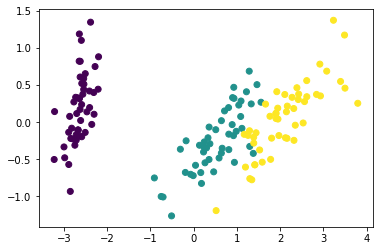

In [22]:
plt.scatter(my_x_trans[:,0],my_x_trans[:,1], c = y)

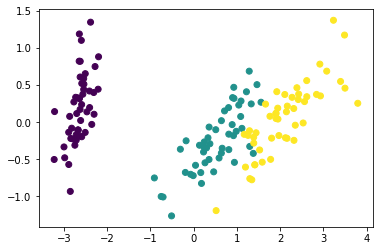

In [23]:
plt.scatter(x_trans[:,0],x_trans[:,1], c = y)

In [24]:
my_pca.components

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [16]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])